In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
precip = pd.read_pickle("../Dataframes/df_precipitation.pkl")

# Vid vilken period regnar det mest?

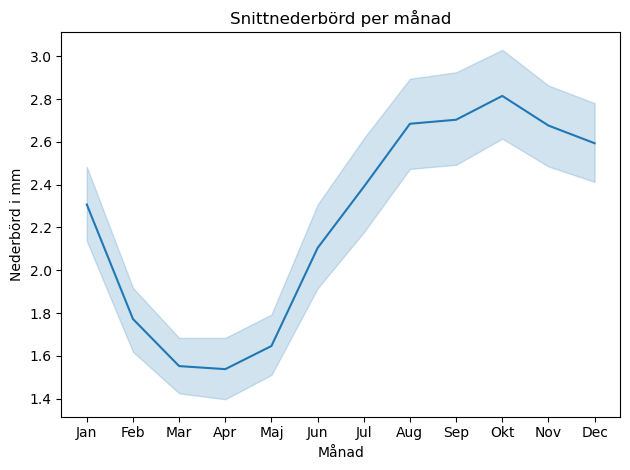

In [4]:
sns.lineplot(x = precip['Month'], y = precip['Nederbördsmängd'], data = precip)
plt.title('Snittnederbörd per månad')
plt.xlabel('Månad')
plt.ylabel('Nederbörd i mm')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])
plt.tight_layout()
# plt.savefig("../plottar/regnpermanad.png")

* Enligt grafen verkar det helt klart som att höstmånaderna (September, Oktober, November)

In [5]:
decemberregn = precip.query("Month == 12")
novemberregn = precip.query("Month == 11")
oktoberregn = precip.query("Month == 10")
septemberregn = precip.query("Month == 9")
augustiregn = precip.query("Month == 8")
juliregn = precip.query("Month == 7")
juniregn = precip.query("Month == 6")
majregn = precip.query("Month == 5")
aprilregn = precip.query("Month == 4")
marsregn = precip.query("Month == 3")
februariregn = precip.query("Month == 2")
januariregn = precip.query("Month == 1")
aprilregn.head()

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg
91,1944-04-01,0.0,G,1944,4,1.2
92,1944-04-02,0.0,G,1944,4,1.2
93,1944-04-03,0.0,G,1944,4,1.2
94,1944-04-04,0.0,G,1944,4,1.2
95,1944-04-05,0.0,G,1944,4,1.2


In [6]:
regnlista = [januariregn, februariregn, marsregn, aprilregn, majregn, juniregn, juliregn, augustiregn, septemberregn, oktoberregn, novemberregn, decemberregn]

In [7]:
def categorize_value(value):
    if value < 0.1:
        return 'Inget regn'
    elif value >= 0.1 and value <0.5:
        return 'Lätt regn'
    elif value >=0.5 and value <4:
        return 'Måttligt regn'
    else:
        return 'Kraftigt regn'

In [8]:
precip2 = precip

In [9]:
precip2['Klass'] = precip2['Nederbördsmängd'].apply(categorize_value)

In [10]:
precip2 = precip2.query('Nederbördsmängd >= 0.1')
precip2

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg,Klass
0,1944-01-01,0.2,G,1944,1,2.70,Lätt regn
1,1944-01-02,0.4,G,1944,1,2.70,Lätt regn
4,1944-01-05,2.1,G,1944,1,2.70,Måttligt regn
7,1944-01-08,14.3,G,1944,1,2.70,Kraftigt regn
8,1944-01-09,2.9,G,1944,1,2.70,Måttligt regn
...,...,...,...,...,...,...,...
29026,2023-06-21,2.6,G,2023,6,1.31,Måttligt regn
29031,2023-06-26,18.5,G,2023,6,1.31,Kraftigt regn
29032,2023-06-27,10.6,G,2023,6,1.31,Kraftigt regn
29034,2023-06-29,5.0,G,2023,6,1.31,Kraftigt regn


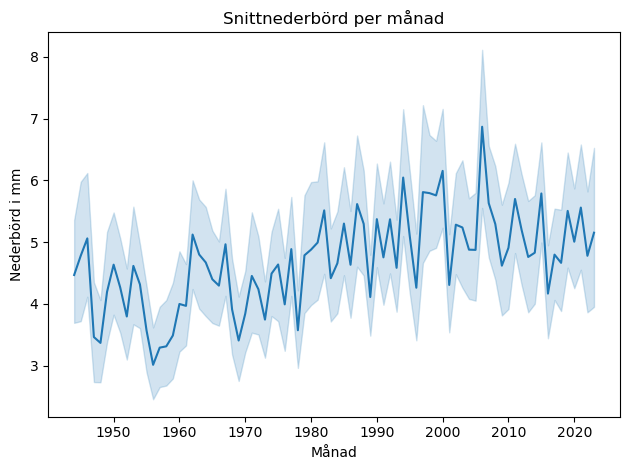

In [11]:
sns.lineplot(x = precip2['Year'], y = precip2['Nederbördsmängd'], data = precip2)
plt.title('Snittnederbörd per månad')
plt.xlabel('Månad')
plt.ylabel('Nederbörd i mm')
# plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])
plt.tight_layout()

In [12]:
lattregn = precip2.query("Nederbördsmängd >= 0.1 and Nederbördsmängd <0.5")
mattligtregn = precip2.query("Nederbördsmängd >= 0.5 and Nederbördsmängd <= 4")
kraftigtregn = precip2.query("Nederbördsmängd > 4")

In [13]:
lattregn

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg,Klass
0,1944-01-01,0.2,G,1944,1,2.70,Lätt regn
1,1944-01-02,0.4,G,1944,1,2.70,Lätt regn
19,1944-01-20,0.2,G,1944,1,2.70,Lätt regn
30,1944-01-31,0.1,G,1944,1,2.70,Lätt regn
45,1944-02-15,0.1,G,1944,2,0.69,Lätt regn
...,...,...,...,...,...,...,...
28988,2023-05-14,0.2,G,2023,5,0.46,Lätt regn
29021,2023-06-16,0.2,G,2023,6,1.31,Lätt regn
29023,2023-06-18,0.2,G,2023,6,1.31,Lätt regn
29024,2023-06-19,0.1,G,2023,6,1.31,Lätt regn


In [14]:
print(f"Antal dagar sedan 1944 med lätt regn: {len(lattregn['Representativt dygn'].unique())}")
print(f"Antal dagar sedan 1944 med måttligt regn: {len(mattligtregn['Representativt dygn'].unique())}")
print(f"Antal dagar sedan 1944 med kraftigt regn: {len(kraftigtregn['Representativt dygn'].unique())}")

Antal dagar sedan 1944 med lätt regn: 2705
Antal dagar sedan 1944 med måttligt regn: 5862
Antal dagar sedan 1944 med kraftigt regn: 5237


<Axes: xlabel='Year', ylabel='Nederbördsmängd'>

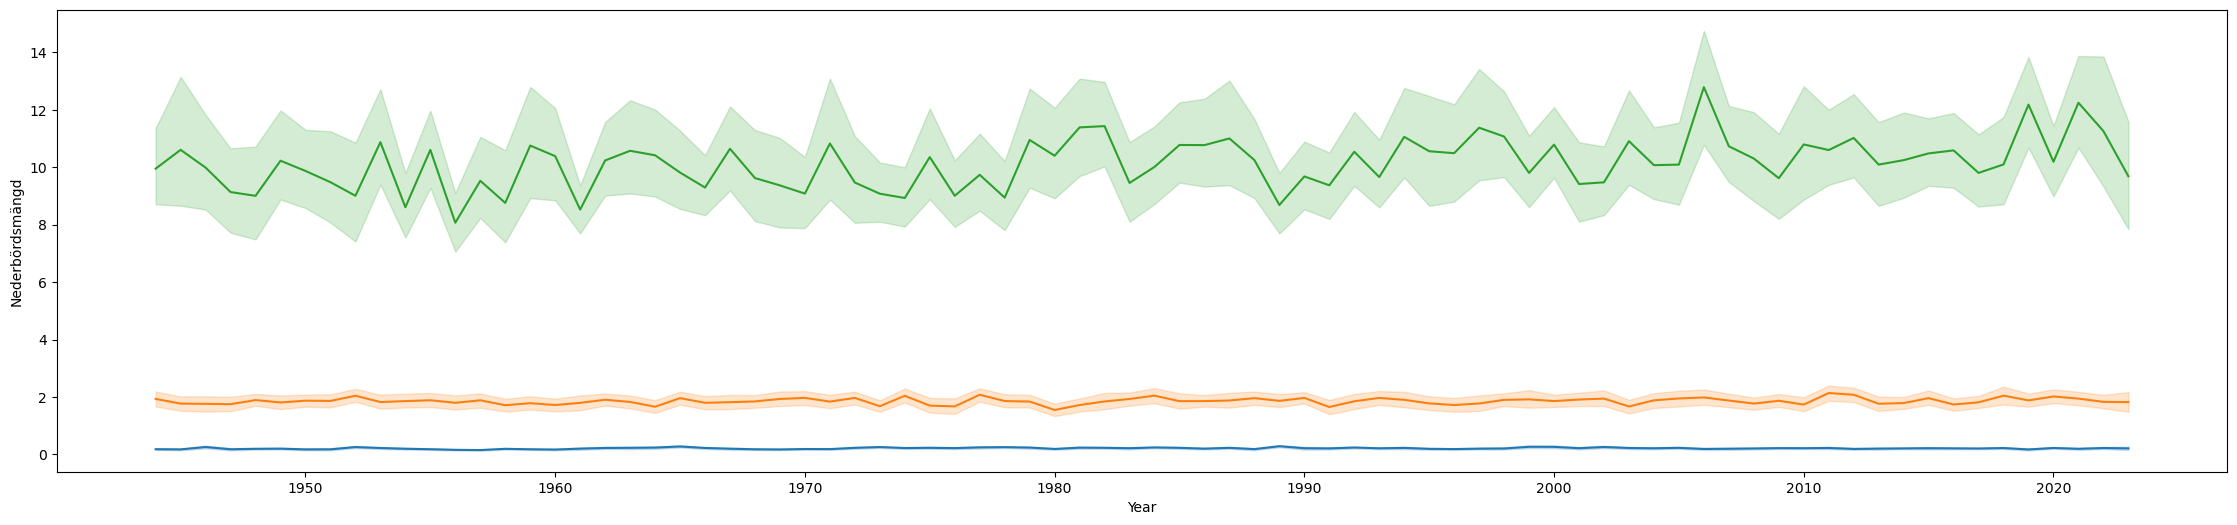

In [15]:
fig, ax = plt.subplots(figsize=(28, 6))
sns.lineplot(data=lattregn, x='Year', y='Nederbördsmängd')
sns.lineplot(data=mattligtregn, x='Year', y='Nederbördsmängd')
sns.lineplot(data=kraftigtregn, x='Year', y='Nederbördsmängd')

<Axes: xlabel='Year', ylabel='Nederbördsmängd'>

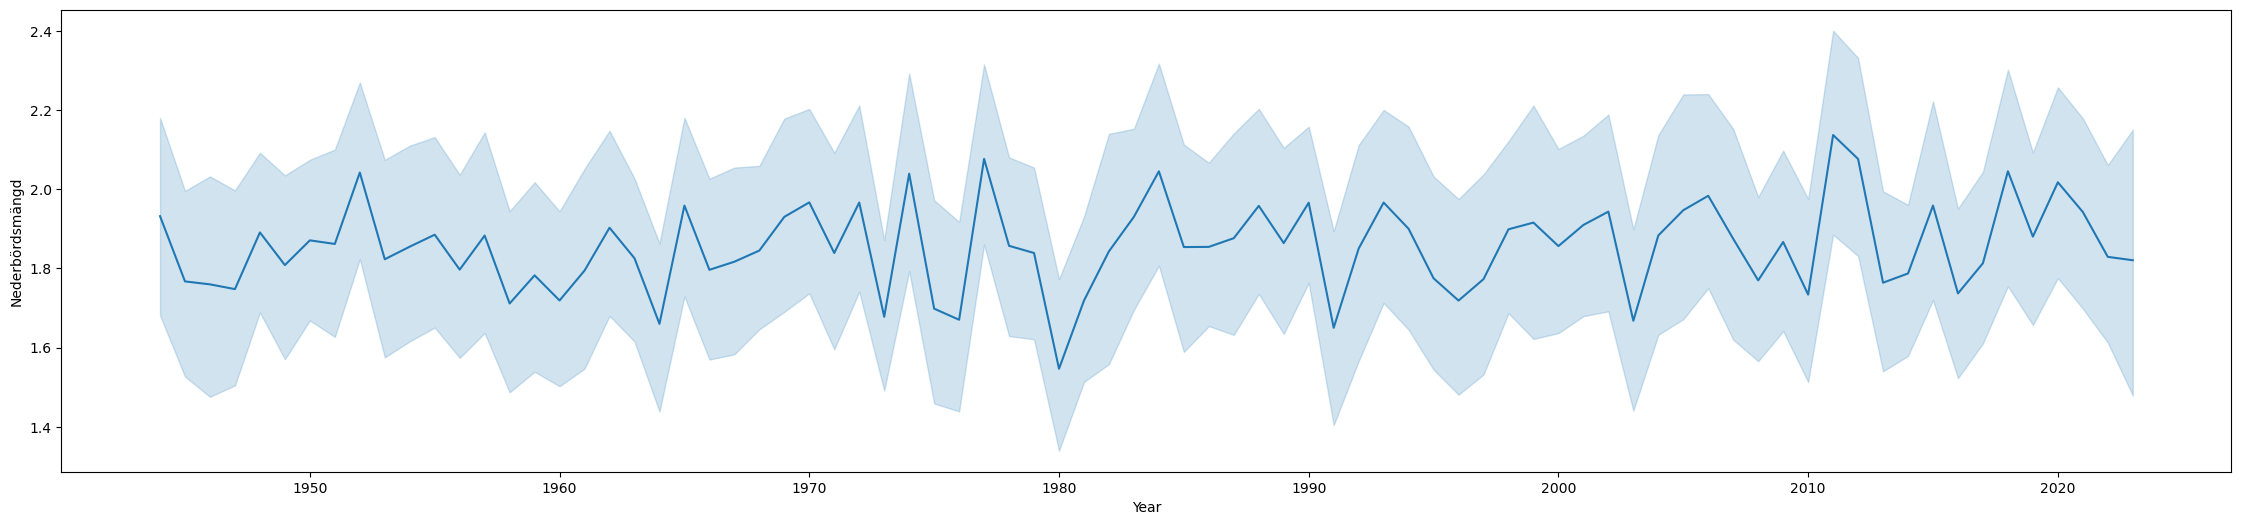

In [16]:
fig, ax = plt.subplots(figsize=(28, 6))
sns.lineplot(data=mattligtregn, x='Year', y='Nederbördsmängd')

<Axes: xlabel='Representativt dygn', ylabel='Nederbördsmängd'>

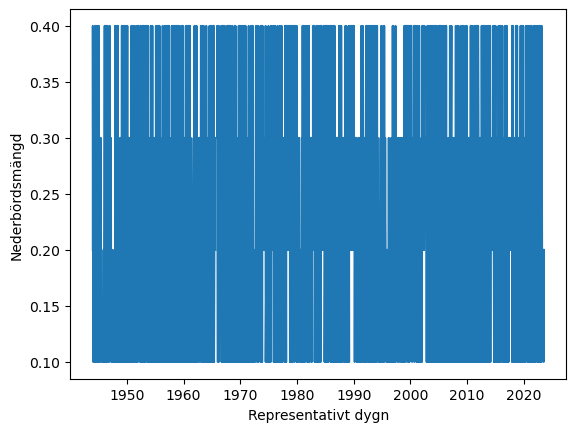

In [17]:
sns.lineplot(data= lattregn, x= 'Representativt dygn', y= 'Nederbördsmängd')

Text(42.25000000000001, 0.5, 'Nederbörd i mm')

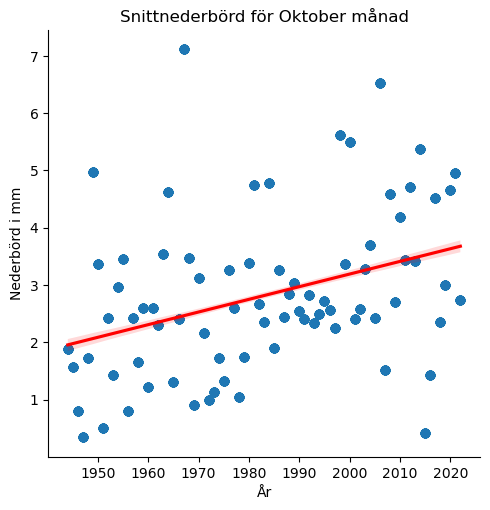

In [18]:
sns.lmplot(x='Year', y='Monthly avg', data=oktoberregn, line_kws={'color': 'red'})
plt.title('Snittnederbörd för Oktober månad')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig('../plottar/oktoberregn.png')

 Som vi ser här så verkar det som att Oktober månad blivit mer regnig på senare år jämfört med tidigare år.
 
Är denna prognosen sann även för den minst regniga månaden April?

Text(29.000000000000007, 0.5, 'Nederbörd i mm')

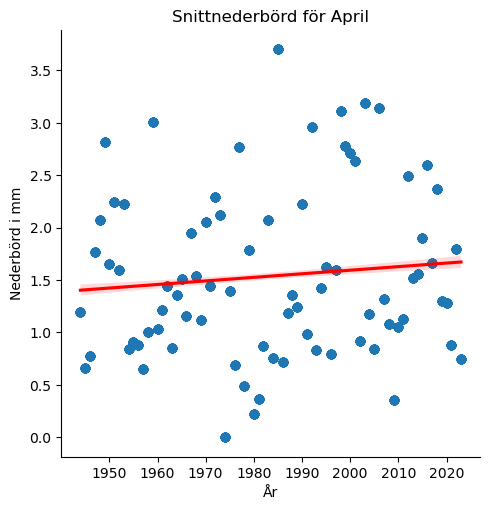

In [19]:
sns.lmplot(x='Year', y='Monthly avg', data=aprilregn, line_kws={'color': 'red'})
plt.title('Snittnederbörd för April')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig('../plottar/aprilregn.png')

Text(42.25000000000001, 0.5, 'Nederbörd i mm')

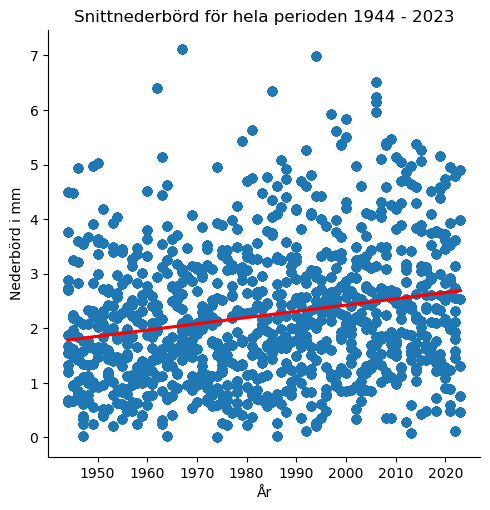

In [20]:
sns.lmplot(x='Year', y='Monthly avg', data=precip, line_kws={'color': 'red'})
plt.title('Snittnederbörd för hela perioden 1944 - 2023')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig("../plottar/regnperår.png")

Det verkar onekligen som att trenden är densamma över tid, vare sig det är vår eller höst

In [21]:
precip

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg,Klass
0,1944-01-01,0.2,G,1944,1,2.70,Lätt regn
1,1944-01-02,0.4,G,1944,1,2.70,Lätt regn
2,1944-01-03,0.0,G,1944,1,2.70,Inget regn
3,1944-01-04,0.0,G,1944,1,2.70,Inget regn
4,1944-01-05,2.1,G,1944,1,2.70,Måttligt regn
...,...,...,...,...,...,...,...
29031,2023-06-26,18.5,G,2023,6,1.31,Kraftigt regn
29032,2023-06-27,10.6,G,2023,6,1.31,Kraftigt regn
29033,2023-06-28,0.0,G,2023,6,1.31,Inget regn
29034,2023-06-29,5.0,G,2023,6,1.31,Kraftigt regn


In [22]:
correlation = precip['Year'].corr(precip['Monthly avg'], method ='pearson')

In [23]:
correlation

0.2074196550128141

In [24]:
anglelist = []

In [25]:
def rainslope(data):
     slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'], data['Monthly avg'])
     angle_degrees = np.arctan(slope) * 180 /np.pi
     return angle_degrees

In [26]:
rainslope(oktoberregn)
manadlista = ['Januari', 'Februari', 'Mars', 'April', 'Maj', 'Juni', 'Juli', 'Augusti', 'September', 'Oktober', 'November', 'December']

In [27]:
for i, x in enumerate(regnlista):
    angle = rainslope(x)
    print(f"Angle of the trendline in {manadlista[i]} is: {round(angle,3)}")
    print()
    anglelist.append(angle)

Angle of the trendline in Januari is: 1.025

Angle of the trendline in Februari is: 1.147

Angle of the trendline in Mars is: 0.755

Angle of the trendline in April is: 0.195

Angle of the trendline in Maj is: 0.526

Angle of the trendline in Juni is: 0.54

Angle of the trendline in Juli is: 0.475

Angle of the trendline in Augusti is: 0.591

Angle of the trendline in September is: 0.097

Angle of the trendline in Oktober is: 1.264

Angle of the trendline in November is: 0.475

Angle of the trendline in December is: 0.918



In [28]:
anglelist

[1.02495593344457,
 1.1469961105703093,
 0.7550491208419576,
 0.19501441770535857,
 0.5259218041755809,
 0.5403720902803132,
 0.4746180086513283,
 0.5908313225308544,
 0.09726883701387215,
 1.2640817486955451,
 0.4745482766057923,
 0.9175884904992353]

In [29]:
barlist = pd.DataFrame({'Month' : manadlista, 'Angle' : anglelist})

In [30]:
barlist

,Month,Angle
0,Januari,1.024956
1,Februari,1.146996
2,Mars,0.755049
3,April,0.195014
4,Maj,0.525922
5,Juni,0.540372
6,Juli,0.474618
7,Augusti,0.590831
8,September,0.097269
9,Oktober,1.264082


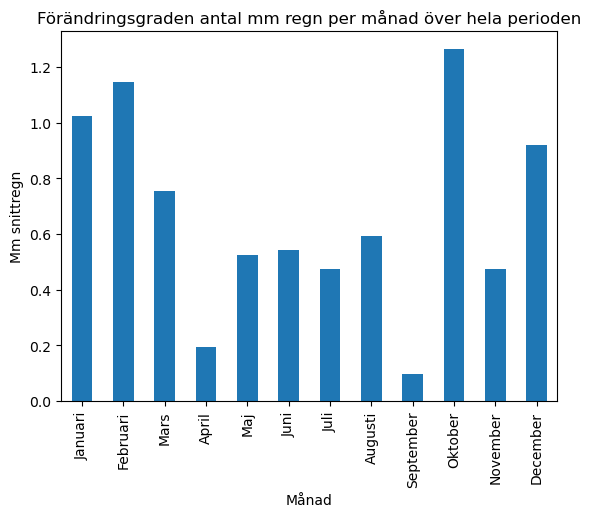

In [32]:
barlist.plot(kind='bar', x='Month', y='Angle', xlabel='Månad', ylabel='Mm regn', legend=False)
plt.title('Genomsnittsförändring av regnfall i mm mellan första och sista mätning')
plt.show()